# 歷史黃金價格

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt ##要用 .annotate的話，  matplotlib.__version__==2.0.2 較沒有問題
from collections import Counter
from bokeh.charts import TimeSeries, output_file, show

In [2]:
df = pd.read_csv('Prices.csv', parse_dates=True)

df = df[['Date', 'US dollar', 'G5 currency index', 'Producer index', 'Consumer index']]  #只留下需要的欄位
df_day= pd.DataFrame(columns = ['30_day', '60_day', '120_day', '240_day'])  #創建新的DataFrame 給定欄位名稱
df = pd.concat([df,df_day], axis = 1)  #新舊DataFrame合併
df.columns = df.columns.str.replace(' ','_')   #欄位中的空格 改為'_'
df['US_dollar'] = df['US_dollar'].str.replace(',','')  #US_dollar裡面有值有","  先換掉才能轉float 
df[['US_dollar','30_day','60_day','120_day','240_day']] = df[['US_dollar','30_day','60_day','120_day','240_day']].astype('float')
df['Date'] = pd.to_datetime(df.Date, errors = 'raise')  #欄位Date 轉為時間格式
df = df.set_index(df['Date'], drop = True)  #欄位Date 設為index
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10131 entries, 1978-12-29 to 2017-10-27
Data columns (total 9 columns):
Date                 10131 non-null datetime64[ns]
US_dollar            10131 non-null float64
G5_currency_index    10129 non-null float64
Producer_index       6470 non-null float64
Consumer_index       8560 non-null float64
30_day               0 non-null float64
60_day               0 non-null float64
120_day              0 non-null float64
240_day              0 non-null float64
dtypes: datetime64[ns](1), float64(8)
memory usage: 791.5 KB


,Date,US_dollar,G5_currency_index,Producer_index,Consumer_index,30_day,60_day,120_day,240_day
Date,,,,,,,,,
1978-12-29,1978-12-29,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-01-01,1979-01-01,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-01-02,1979-01-02,226.8,132.5,NaN,NaN,NaN,NaN,NaN,NaN
1979-01-03,1979-01-03,218.6,134.2,NaN,NaN,NaN,NaN,NaN,NaN
1979-01-04,1979-01-04,223.2,134.0,NaN,NaN,NaN,NaN,NaN,NaN


## 新增日均線欄位的值

In [3]:
t = 30; s = 60; tlf = 120; ttf = 240
for num in range(len(df['US_dollar'])+1):
    df.iloc[t-1:t, 5] = df.iloc[t-30:t, 1].mean()
    t += 1
    df.iloc[s-1:s, 6] = df.iloc[s-60:s, 1].mean()
    s += 1
    df.iloc[tlf-1:tlf, 7] = df.iloc[tlf-120:tlf, 1].mean()
    tlf += 1
    df.iloc[ttf-1:ttf, 8] = df.iloc[ttf-240:ttf, 1].mean()
    ttf += 1
    
df[10128:]
df.to_csv('Prices_new.csv')

## 黃金價格折線圖

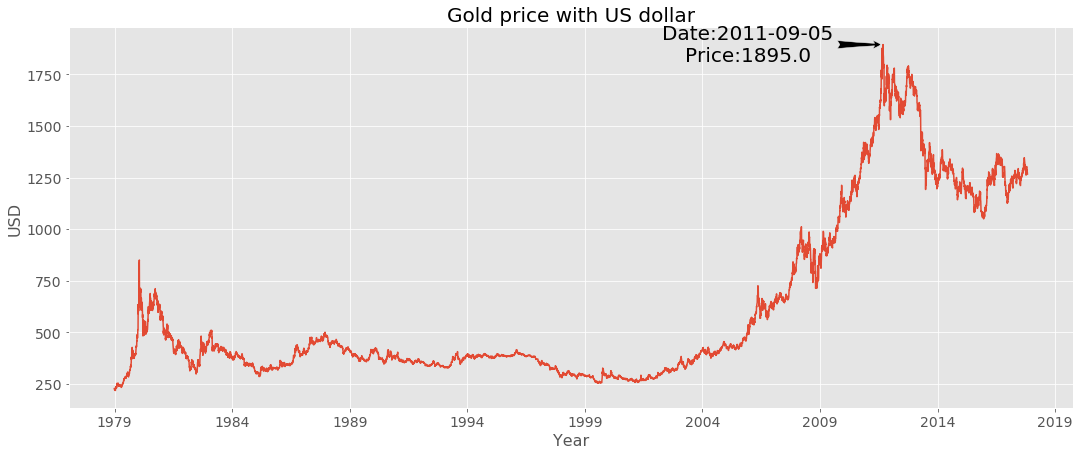

In [4]:
plt.rcdefaults()
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18,7)
plt.rcParams['axes.labelsize'] = 16 
plt.rcParams['xtick.labelsize'] = 14 
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['savefig.bbox'] = 'tight'  # 把所有的標籤都存進圖片(不會被切掉)

plt.plot(df['Date'], df['US_dollar'])  
plt.title('Gold price with US dollar') ; plt.xlabel('Year') ; plt.ylabel('USD')

ymax = df['US_dollar'].max()   #計算US_dollar最高點
xpos = list(df['US_dollar']).index(df['US_dollar'].max())  #計算US_dollar最高點對應到資料的位置
xmax = df.Date[xpos]  #計算US_dollar最高點對應到Date的值

plt.annotate('%s%s%s%s' %('Date:', str(xmax)[:10], '\nPrice:', ymax), xy=(xmax, ymax), xytext=(df.Date[xpos-1500], ymax), size = 20,
            va="center", ha="center", arrowprops=dict(facecolor='black', arrowstyle='fancy'))
#plt.savefig('img/GoldPrice_US dollar.png')

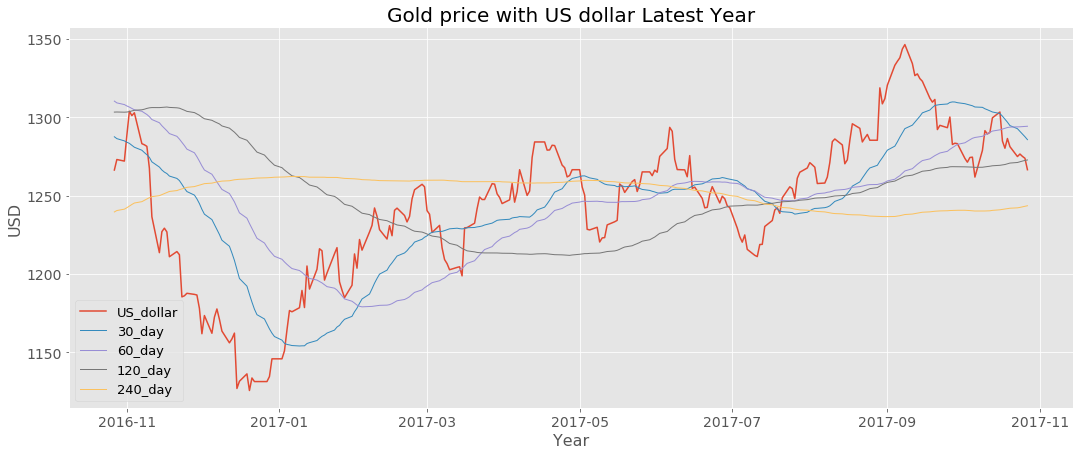

In [5]:
plt.rcParams['legend.fontsize'] = 13

ndf = df[-262:]
plt.plot(ndf['Date'], ndf['US_dollar'])
plt.plot(ndf['Date'], ndf['30_day'], lw = 1)
plt.plot(ndf['Date'], ndf['60_day'], lw = 1)
plt.plot(ndf['Date'], ndf['120_day'], lw = 1)
plt.plot(ndf['Date'], ndf['240_day'], lw = 1)

plt.title('Gold price with US dollar Latest Year')   ## 圖片標題
plt.xlabel('Year')    ## X軸標題
plt.ylabel('USD')    ## Y軸標題
plt.legend()  ## 顯示標籤
#plt.savefig('img/GoldPrice_latestyear.png')

## GoldPrice - Bokeh Plot

In [6]:
df_plot = df[['US_dollar', '30_day', '60_day', '120_day', '240_day']]
p = TimeSeries(df_plot, title="GoldPrices_History", ylabel='US dollar', xlabel = 'Year', width=800, height=450)
output_file("img/GoldPrices_Timeseries_History.html")
show(p)

ldf_plot = df[['US_dollar', '30_day', '60_day', '120_day', '240_day']][-261:]
o = TimeSeries(ldf_plot, title="GoldPrices_LatestYear", ylabel='US dollar', xlabel = 'Year', width=800, height=450)
output_file("img/GoldPrices_Timeseries_LatestYear.html")
show(o)

C:\Users\wanget\Anaconda3\lib\site-packages\bokeh\core\json_encoder.py:73: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  if pd and isinstance(obj, pd.tslib.Timestamp):


# 黃金供需關係

In [7]:
gd = pd.read_csv('Gold_Demand.csv')
gd = gd.set_index(gd['Year'], drop = True)
del gd['Year']
gd = gd[:7]  #留下前七行資料
gd = gd.rename(columns={'ETFs & similar products*':'ETFs & similar products', 'Central banks & other inst.':'Central banks & other inst'})
gd

,Jewellery,Technology,Total bar and coin demand,ETFs & similar products,Central banks & other inst
Year,,,,,
2010,2053.812635,460.497351,1203.614796,420.405815,79.150503
2011,2094.444857,428.586667,1497.926689,236.842932,480.786497
2012,2134.919952,381.339577,1303.479362,306.585759,569.347245
2013,2695.443046,355.923128,1715.722501,-914.327874,623.846705
2014,2492.037473,348.671368,1045.170532,-182.904007,583.901607
2015,2404.400002,331.963746,1066.696214,-128.315891,576.537131
2016,2046.741905,323.432572,1043.246387,534.245802,389.752900


In [8]:
gd_t = np.transpose(gd)
gd_t

xlabel = ['Jewellery' ,'Technology' ,'Total bar \n and \ncoin demand',\
          ' ETFs \n and \nsimilar products', 'Central banks \n and \nother inst']

## 歷年黃金需求者 需求量

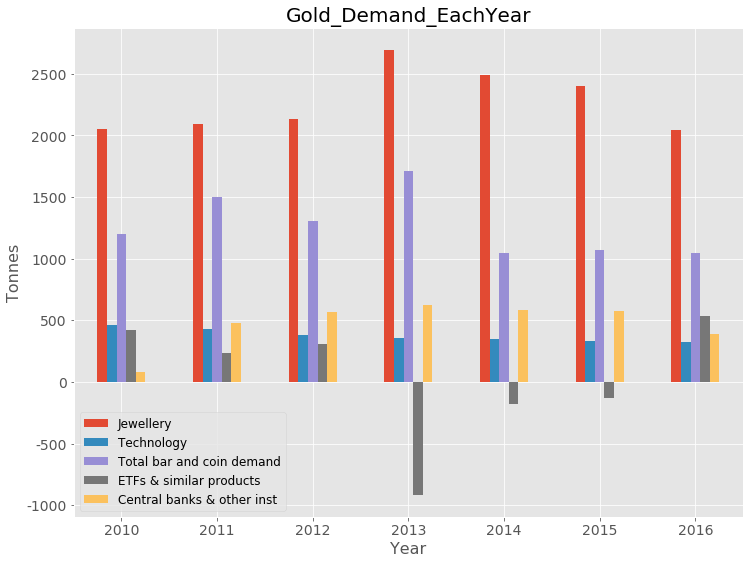

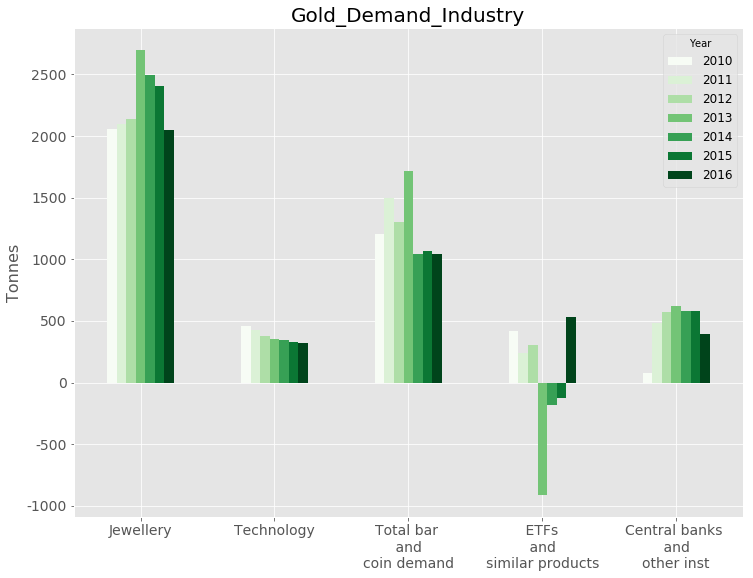

In [9]:
plt.rcdefaults()  ##重置 plt.rcParams
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus'] = False #正常顯示負號
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['axes.labelsize'] = 16  # 設定x y軸 label 字體大小
plt.rcParams['axes.titlesize'] = 20    # 設定標題大小
plt.rcParams['legend.fontsize'] = 12  # 設定 legend 大小
plt.rcParams['savefig.bbox'] = 'tight'  # 把所有的標籤都存進圖片(不會被切掉)
plt.rcParams['xtick.labelsize'] = 14 # x軸標籤大小
plt.rcParams['ytick.labelsize'] = 14 # y軸標籤大小

gd.plot(kind='bar')
plt.title('Gold_Demand_EachYear') ; plt.ylabel('Tonnes') ; plt.xlabel('Year')
plt.xticks(rotation=0)
#plt.savefig('img/gold_demand for eachyear.png')

#my_colors = [(x/7.0, x/14.0, 0.75) for x in range(len(gd))]
gd_t.plot(kind='bar', colormap='Greens').set_xticklabels(xlabel, rotation=0)
plt.title('Gold_Demand_Industry') ; plt.ylabel('Tonnes')
#plt.savefig('img/gold_demand for eachindustry.png')

## 黃金需求者 for each year

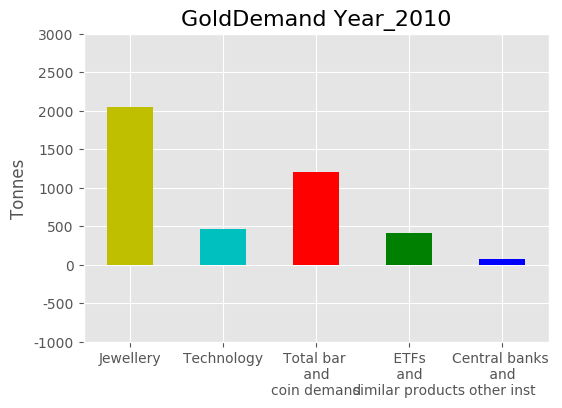

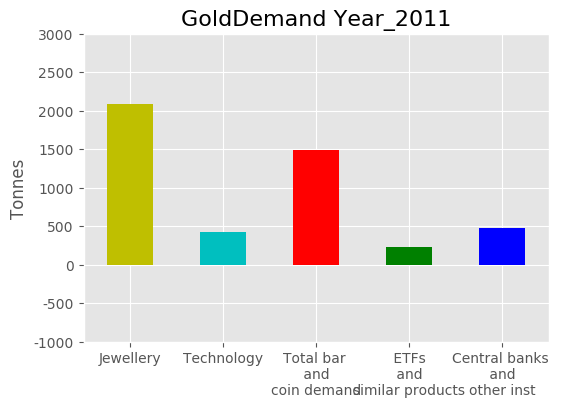

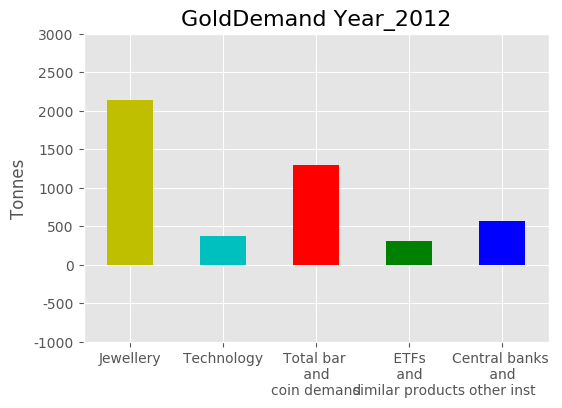

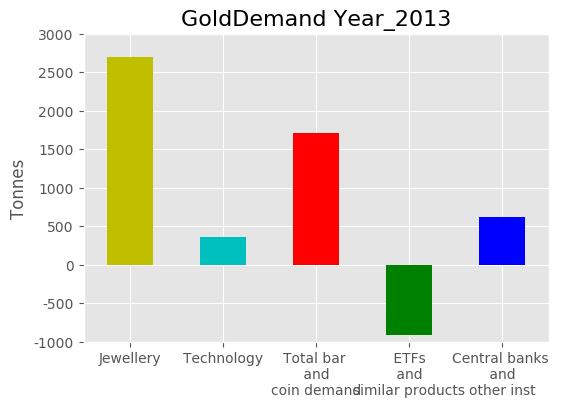

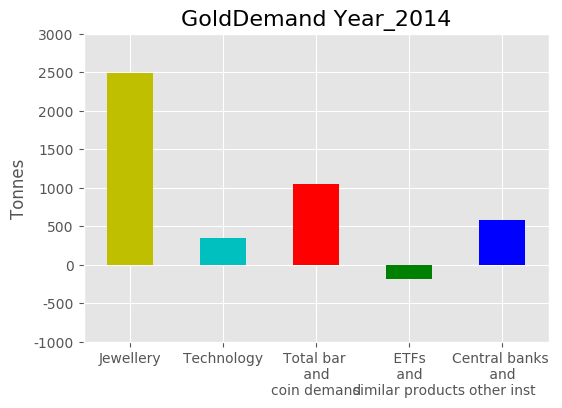

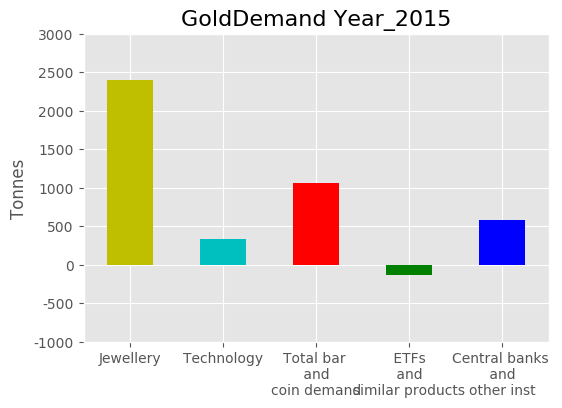

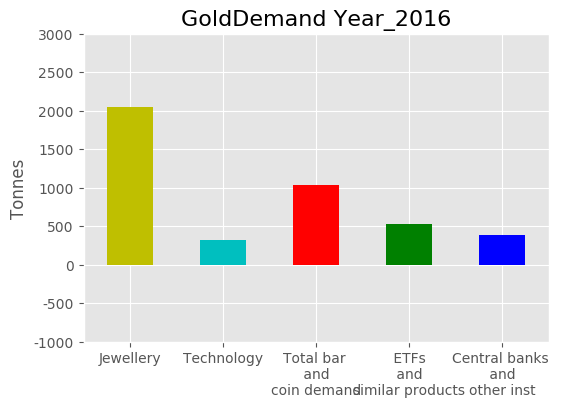

In [10]:
##############  用迴圈畫圖  ###########################
plt.rcdefaults()  ##重置 plt.rcParams
plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus'] = False #正常顯示負號
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.labelsize'] = 12  # 設定x y軸 label 字體大小
plt.rcParams['axes.titlesize'] = 16    # 設定標題大小
#plt.rcParams['savefig.transparent'] = True  # 存檔背景透明
plt.rcParams['savefig.bbox'] = 'tight'  # 把所有的標籤都存進圖片(不會被切掉)

colors = 'ycrgb'
i=0
for num in range(len(gd_t.columns)):
    gd_t[gd_t.columns[i:i+1]].plot(kind='bar', legend=False, color = colors).set_xticklabels(xlabel, rotation=0)
    plt.title('%s%s' %('GoldDemand Year_', gd_t.columns[i])) ; plt.ylabel('Tonnes')
    plt.ylim(-1000, 3000)
    #plt.savefig('%s%s%s' %('img/GoldDemand Year_', gd_t.columns[i], '.png'))
    i += 1

## 黃金需求者 by Industry

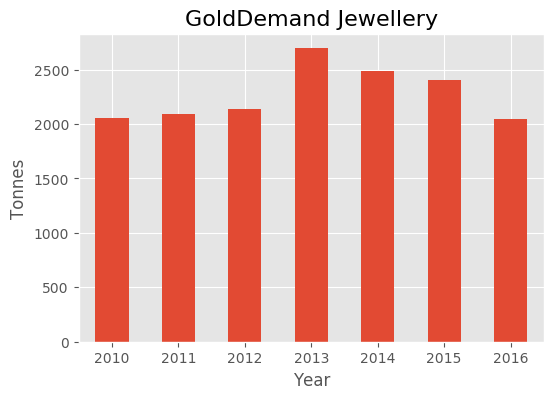

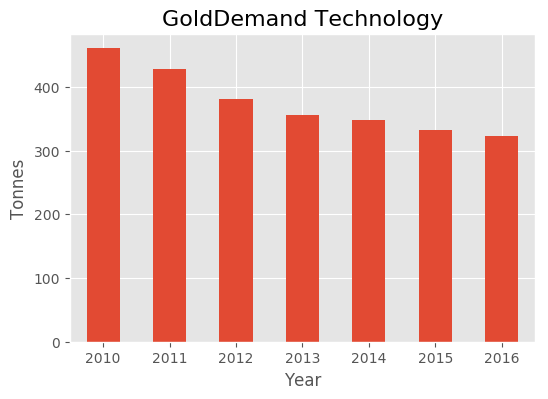

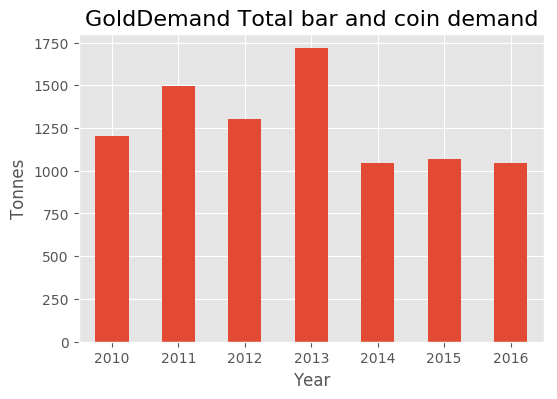

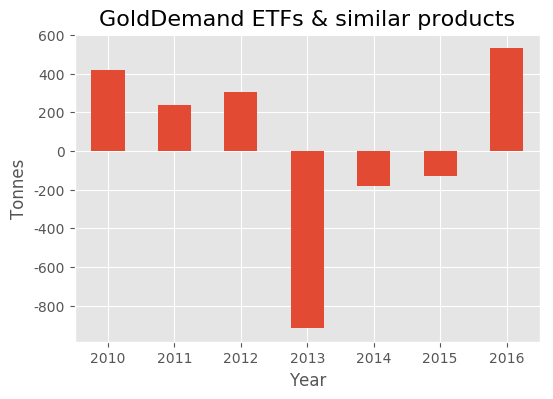

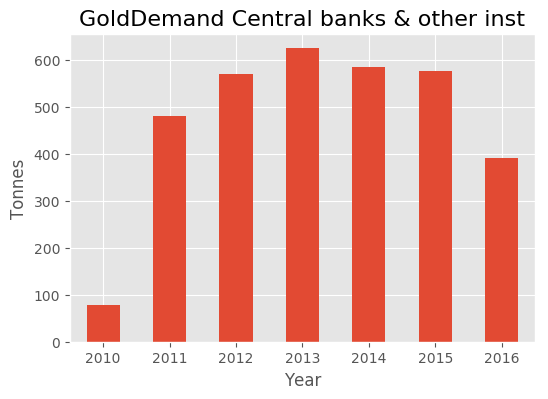

In [11]:
##############  用迴圈畫圖  ###########################
plt.rcdefaults()  ##重置 plt.rcParams
plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus'] = False #正常顯示負號
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.labelsize'] = 12  # 設定x y軸 label 字體大小
plt.rcParams['axes.titlesize'] = 16    # 設定標題大小
#plt.rcParams['savefig.transparent'] = True  # 存檔背景透明
plt.rcParams['savefig.bbox'] = 'tight'  # 把所有的標籤都存進圖片(不會被切掉)

colors = 'ycrgb'
i=0
for num in range(len(gd.columns)):
    gd[gd.columns[i:i+1]].plot(kind='bar', legend=False)
    plt.title('%s%s' %('GoldDemand ', gd.columns[i])) ; plt.ylabel('Tonnes') ; plt.xlabel('Year')
    #plt.ylim(-1000, 3000)
    plt.xticks(rotation=0)
    #plt.savefig('%s%s' %('img/GoldDemand ', gd.columns[i], '.png'))
    i += 1

# 黃金儲備量統計

In [12]:
gr = pd.read_csv('Gold_Reserve.csv')
gr = gr.set_index(gr['Year'], drop = True)
gr = gr.rename(columns={'United States':'US'})  #欄位名稱 United States 改為 US
del gr['Year']
gr.info()
gr.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 2000 to 2017
Data columns (total 15 columns):
US             18 non-null float64
Germany        18 non-null float64
IMF            18 non-null float64
Italy          18 non-null int64
France         18 non-null float64
China          18 non-null float64
Russia         18 non-null float64
Switzerlan     18 non-null float64
Japan          18 non-null float64
Netherlands    18 non-null float64
India          18 non-null int64
BIS            18 non-null float64
ECB            18 non-null float64
Turkey         18 non-null float64
Taiwan         18 non-null float64
dtypes: float64(13), int64(2)
memory usage: 2.2 KB


,US,Germany,IMF,Italy,France,China,Russia,Switzerlan,Japan,Netherlands,India,BIS,ECB,Turkey,Taiwan
Year,,,,,,,,,,,,,,,
2000,8137.50,3469.00,3217.0,2452,3025.00,395.00,379.00,2504.00,759.00,912.00,358,199.00,747.0,116.0,421.50
2001,8142.50,3463.00,3217.0,2452,3025.00,421.50,403.50,2289.00,764.75,898.00,358,197.00,767.0,116.0,422.00
2002,8149.00,3446.50,3217.0,2452,3025.00,525.25,397.25,2023.25,765.00,872.25,358,197.00,767.0,116.0,421.50
2003,8135.00,3442.25,3217.0,2452,3025.00,600.00,388.25,1740.50,765.00,825.00,358,193.25,767.0,116.0,422.25
2004,8135.75,3435.50,3217.0,2452,3014.75,600.00,389.00,1456.50,765.00,777.00,358,207.00,767.0,116.0,422.50


In [13]:
gr_t = np.transpose(gr)
gr_t = gr_t[1:] #留下第一欄以後的資料
gr_t.head()

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Germany,3469.0,3463.0,3446.50,3442.25,3435.50,3429.25,3424.5,3419.5,3414.00,3409.00,3404.25,3399.75,3394.75,3390.0,3384.5,3381.50,3378.75,3376.0
IMF,3217.0,3217.0,3217.00,3217.00,3217.00,3217.00,3217.0,3217.0,3217.00,3164.00,2898.75,2814.00,2814.00,2814.0,2814.0,2814.00,2814.00,2814.0
Italy,2452.0,2452.0,2452.00,2452.00,2452.00,2452.00,2452.0,2452.0,2452.00,2452.00,2452.00,2452.00,2452.00,2452.0,2452.0,2452.00,2452.00,2452.0
France,3025.0,3025.0,3025.00,3025.00,3014.75,2893.00,2764.0,2650.5,2534.25,2442.25,2435.00,2435.00,2435.00,2435.0,2435.0,2435.50,2436.00,2436.0
China,395.0,421.5,525.25,600.00,600.00,600.00,600.0,600.0,600.00,940.50,1054.00,1054.00,1054.00,1054.0,1054.0,1545.75,1825.50,1843.0


## 歷年前15大黃金儲備量 - 依年份作圖

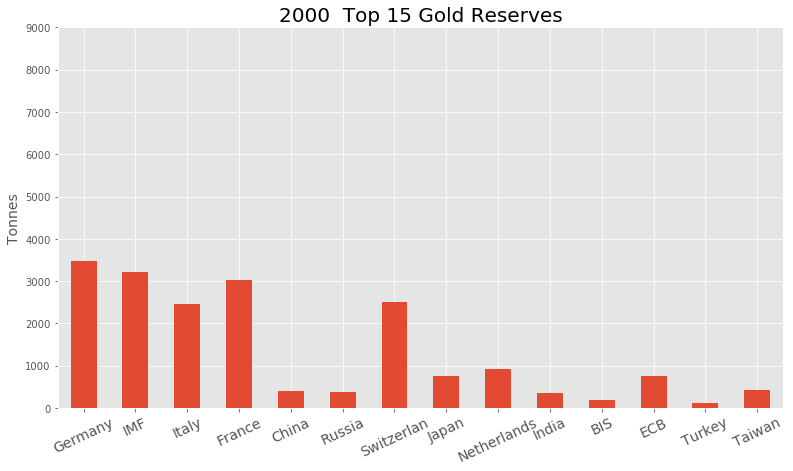

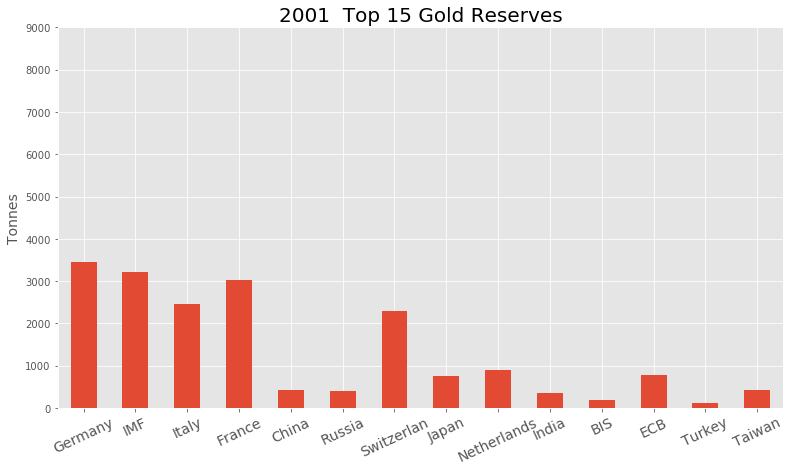

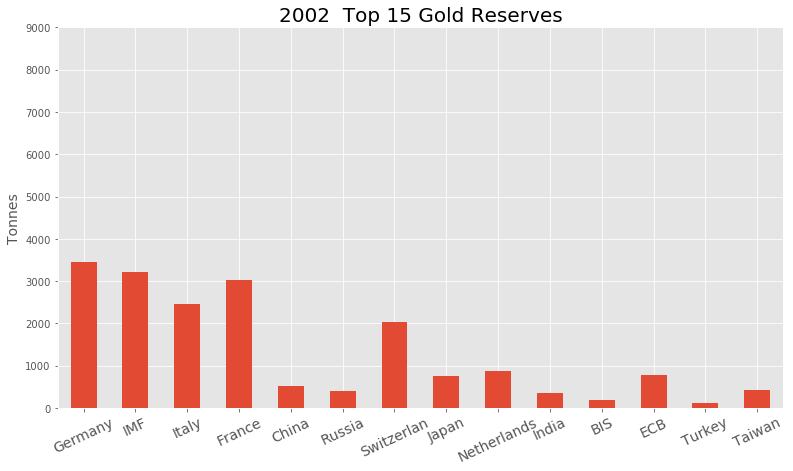

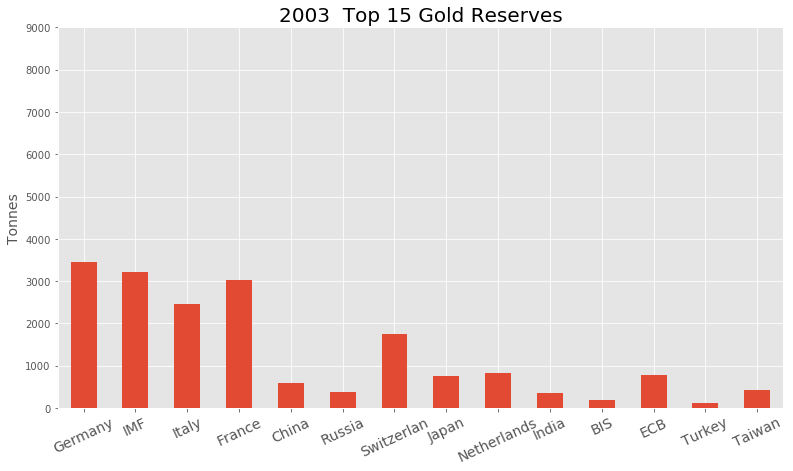

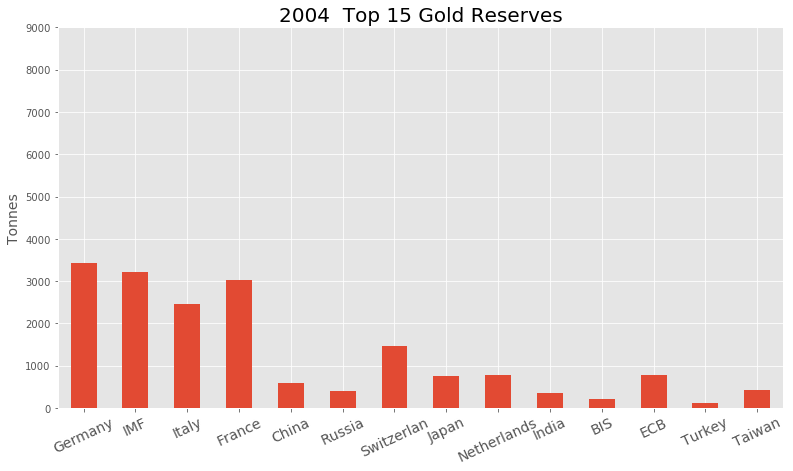

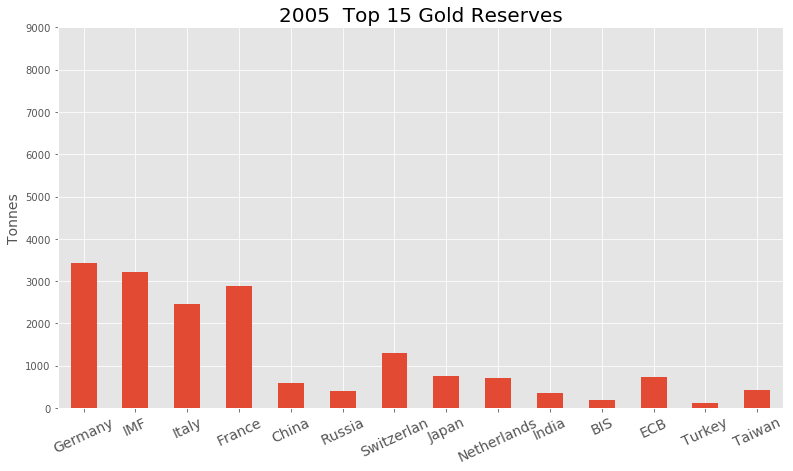

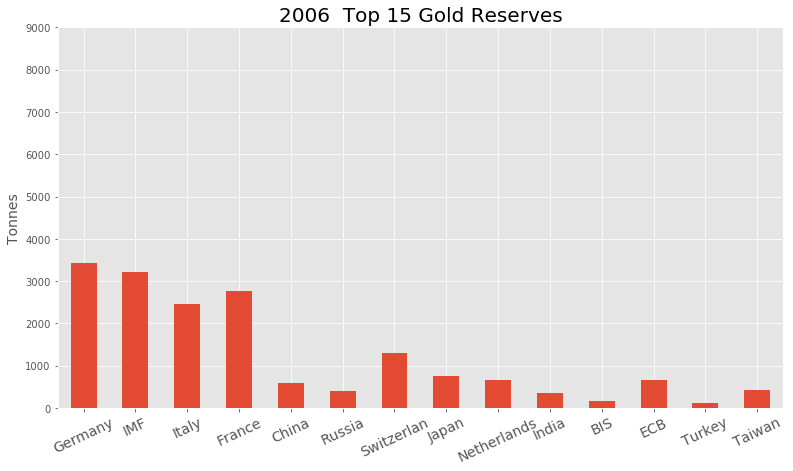

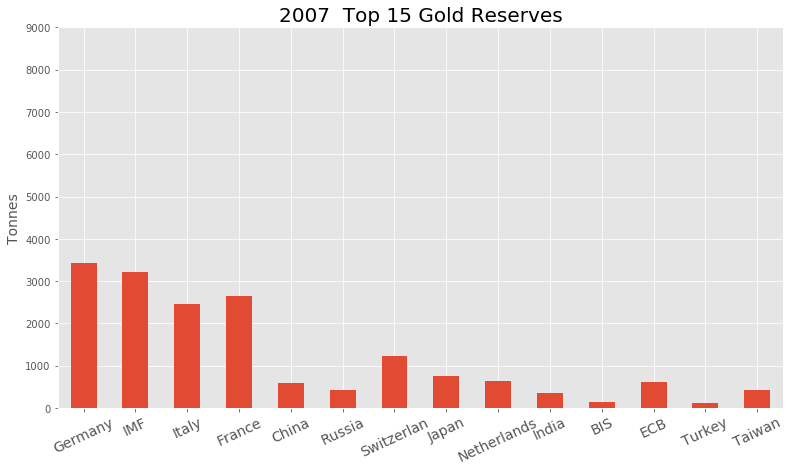

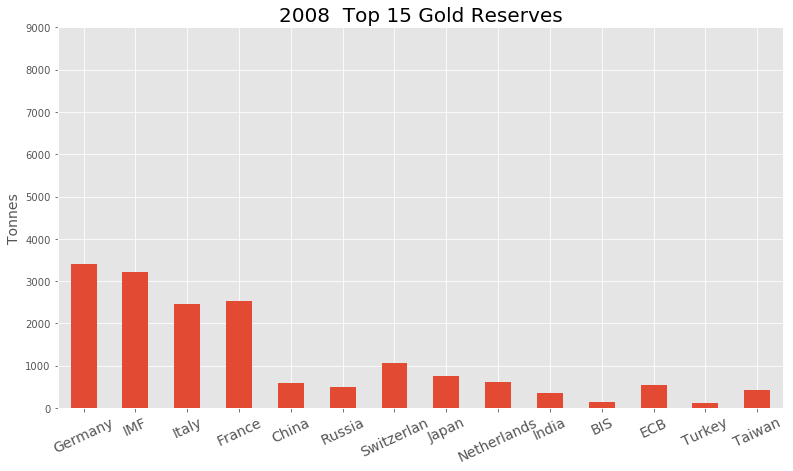

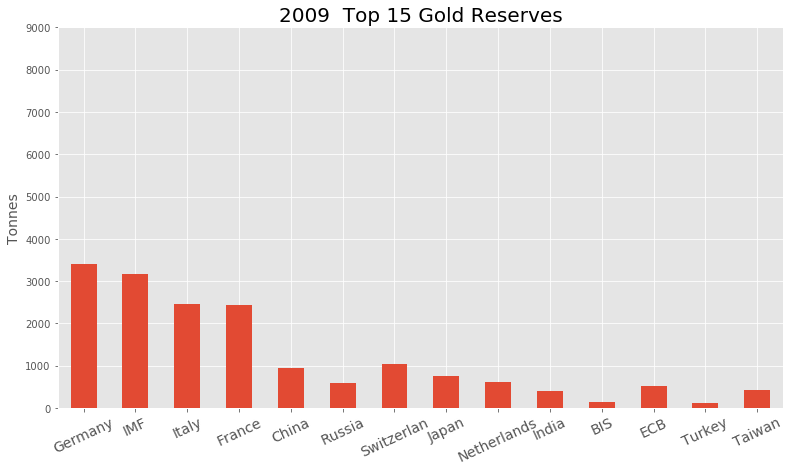

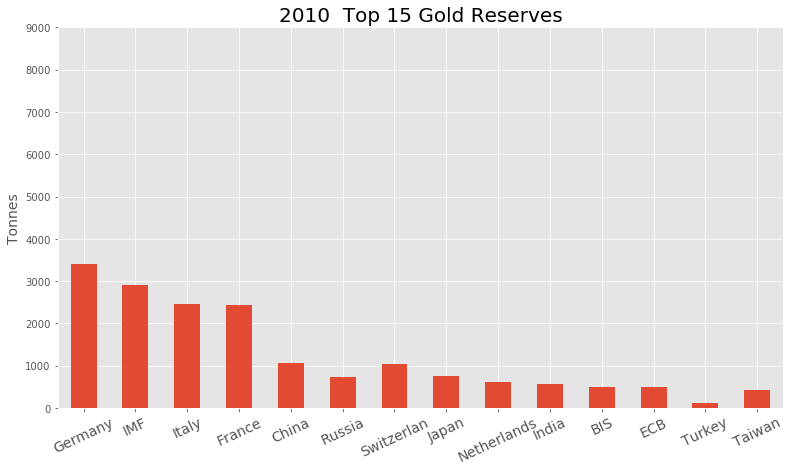

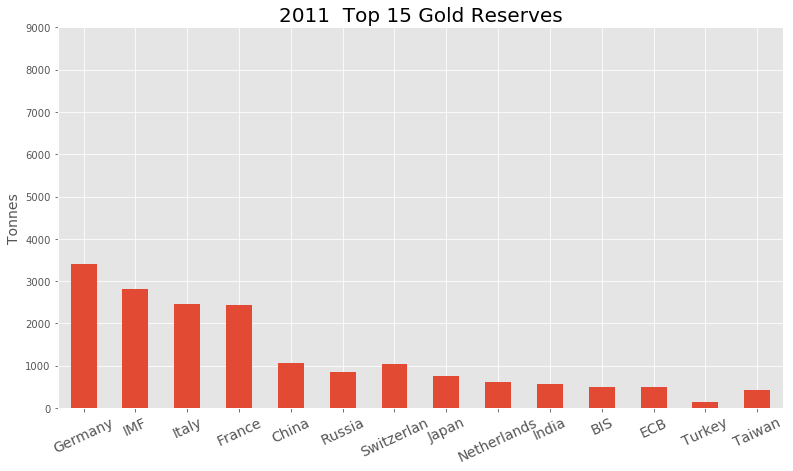

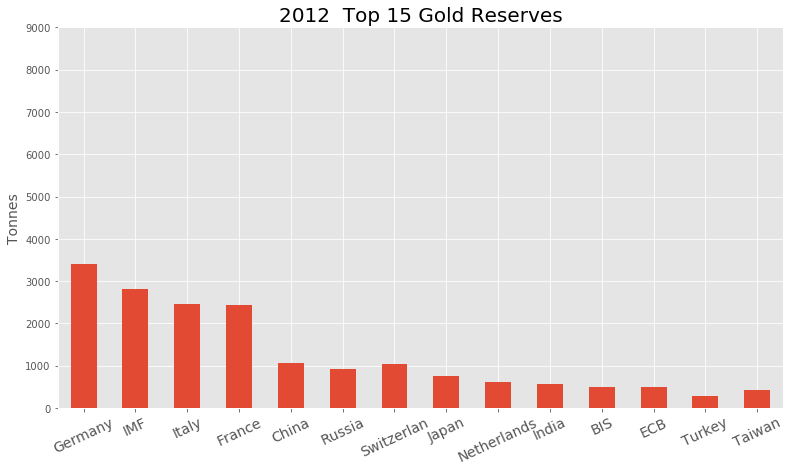

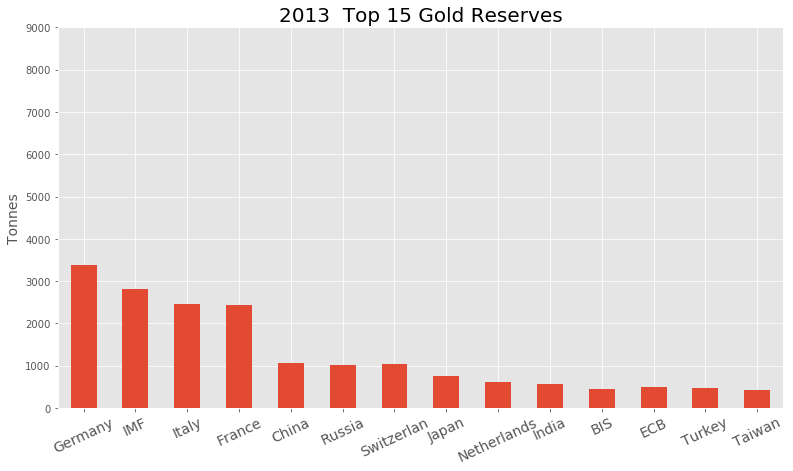

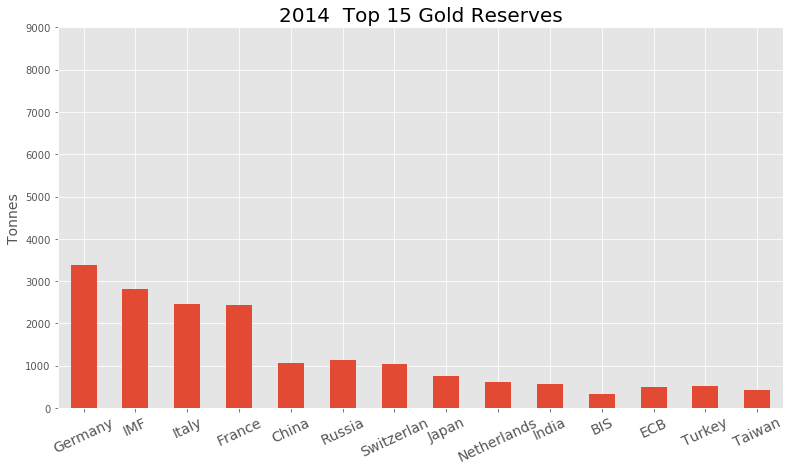

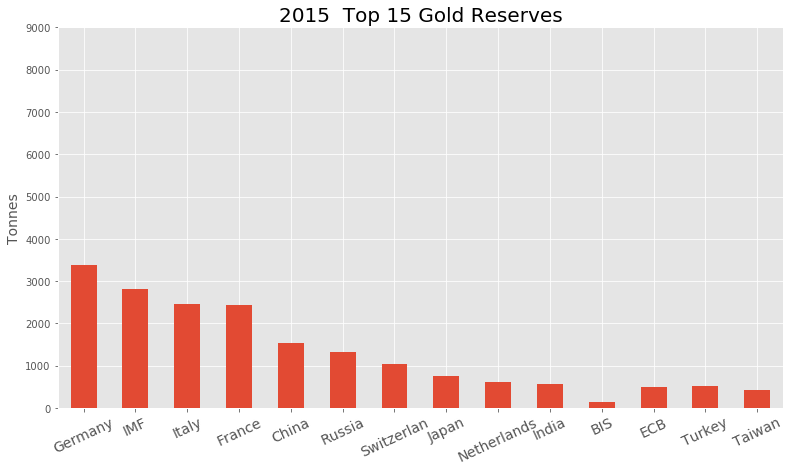

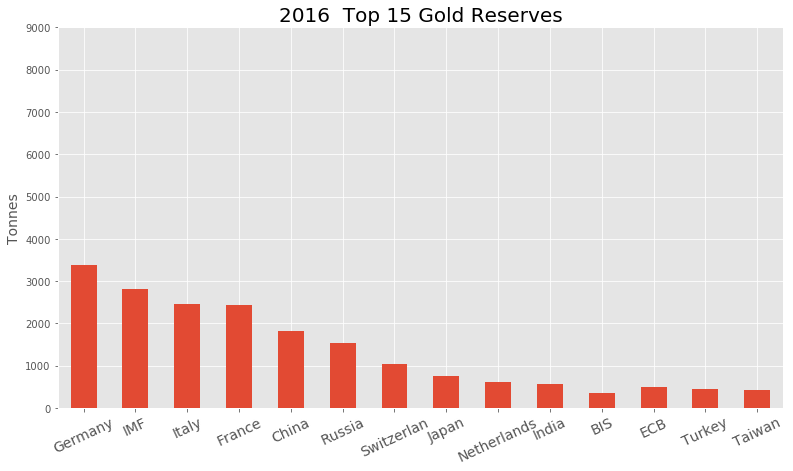

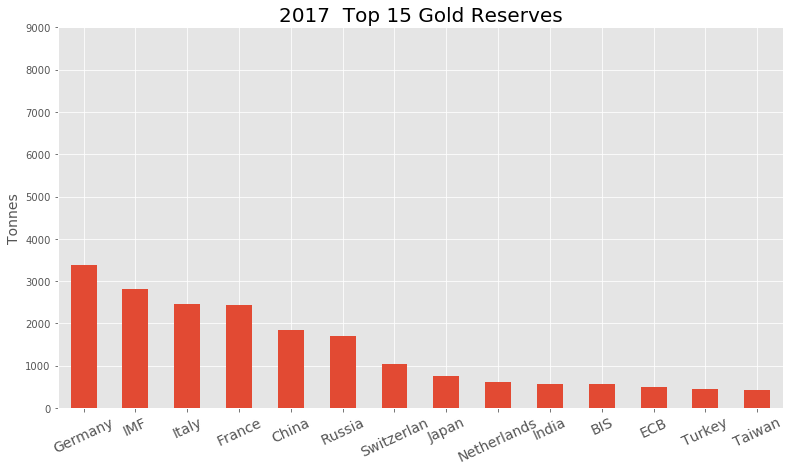

In [14]:
##############  用迴圈畫圖  ###########################
plt.rcdefaults()  ##重置 plt.rcParams
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (13, 7)
plt.rcParams['axes.labelsize'] = 14  ##設定x y軸 label 字體大小
plt.rcParams['axes.titlesize'] = 20    # 設定標題大小
#plt.rcParams['savefig.transparent'] = True  # 存檔背景透明
plt.rcParams['savefig.bbox'] = 'tight'  # 把所有的標籤都存進圖片(不會被切掉)
plt.rcParams['xtick.labelsize'] = 14

i=0
for num in range(len(gr_t.columns)):
    gr_t[gr_t.columns[i:i+1]].plot(kind='bar', legend=False)
    plt.ylim(0,9000) 
    plt.title('%s%s' %(  gr_t.columns[i], '  Top 15 Gold Reserves')) ; plt.ylabel('Tonnes')
    plt.xticks(rotation=25)
    #plt.savefig('%s%s%s%s' %('img/',  gr_t.columns[i], '  Top 15 Gold Reserves', '.png'))
    i += 1

## 歷年前15大黃金儲備量 - 依國家別作圖

In [15]:
## 給 單一國別 vs 歷年黃金存量用
i=gr.index[0]
list_year = []
for num in range(len(gr.index)):
        list_year.append(i)
        i+=1
    #print(i)
print(list_year)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


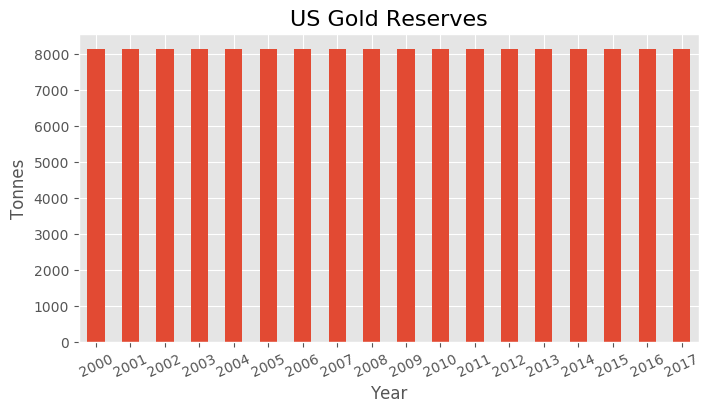

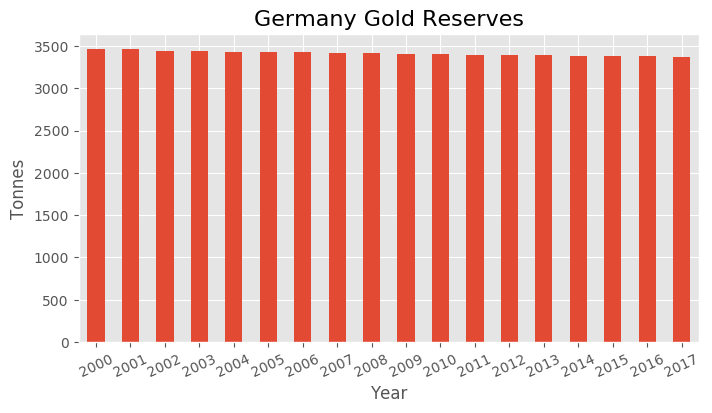

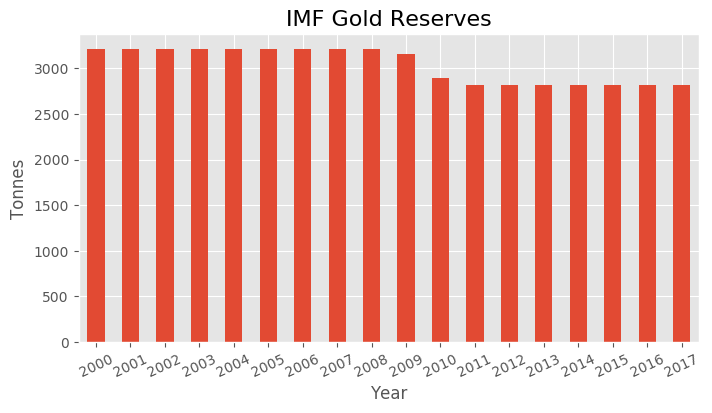

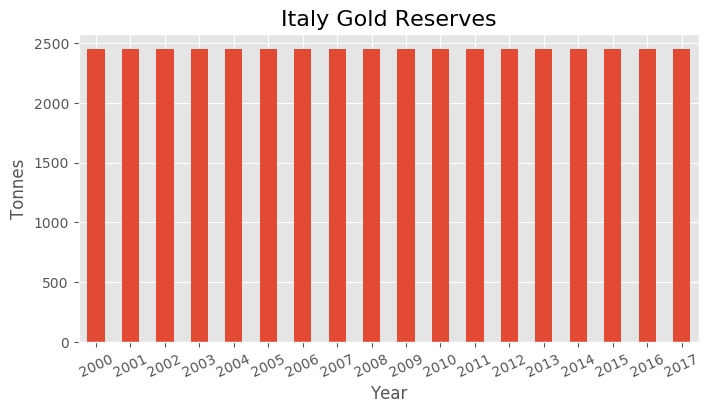

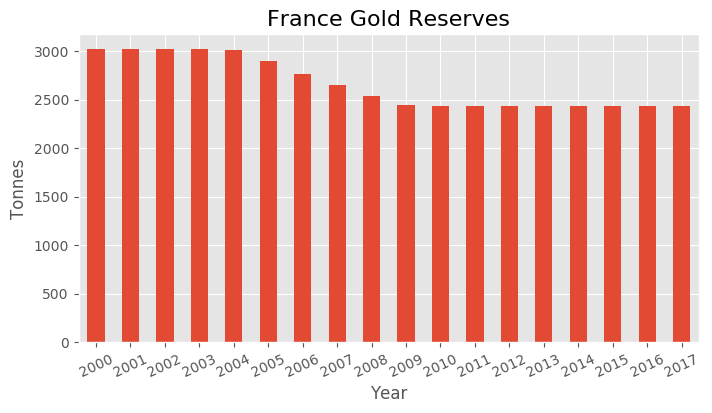

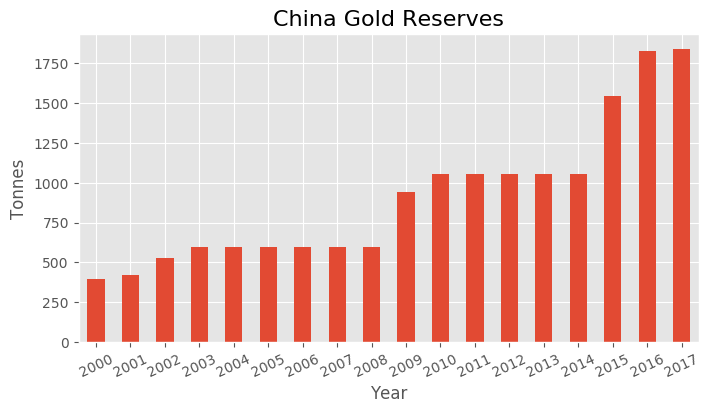

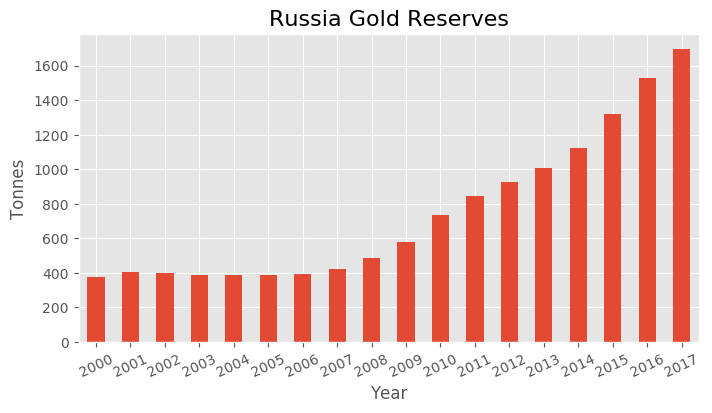

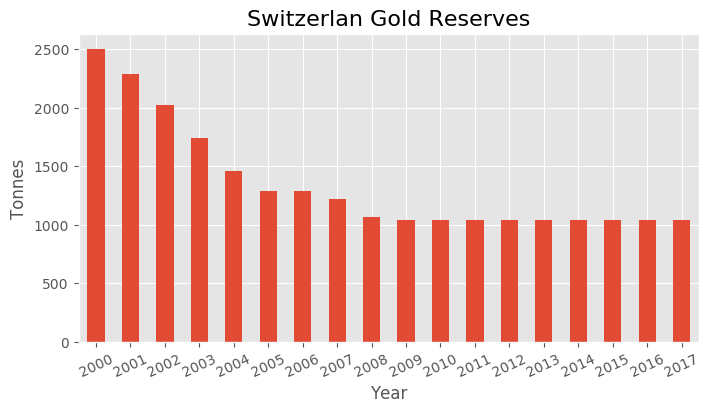

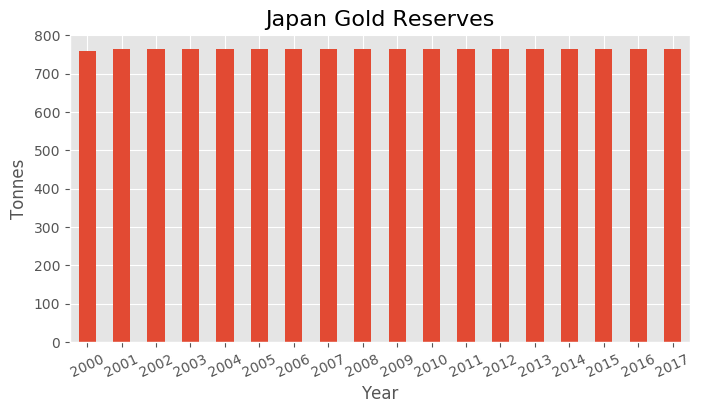

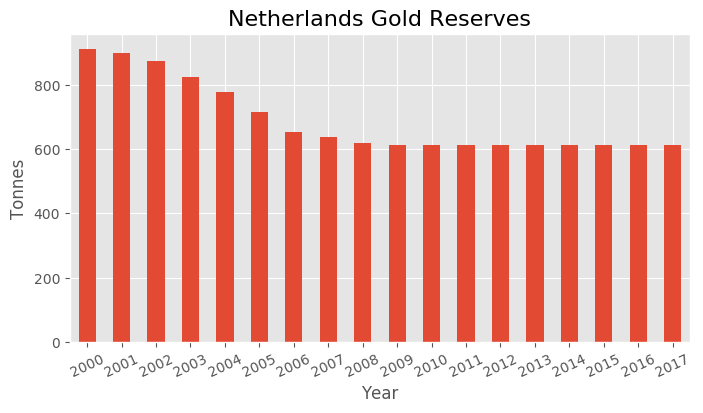

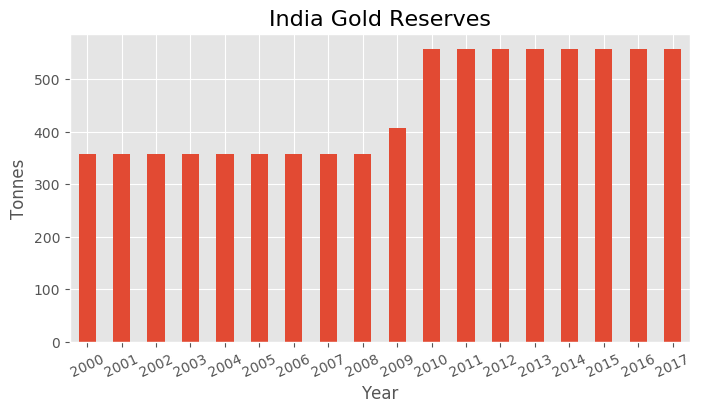

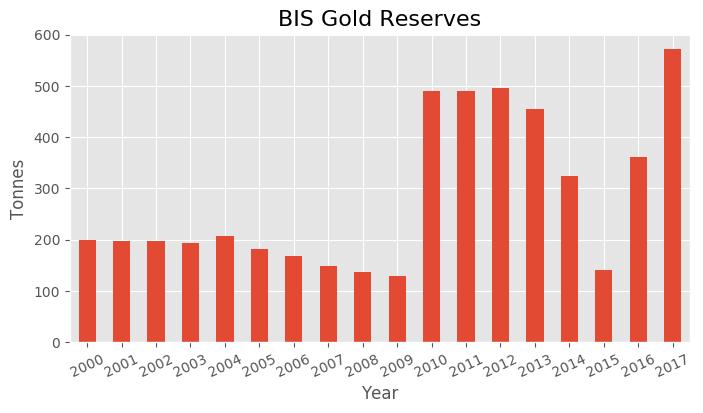

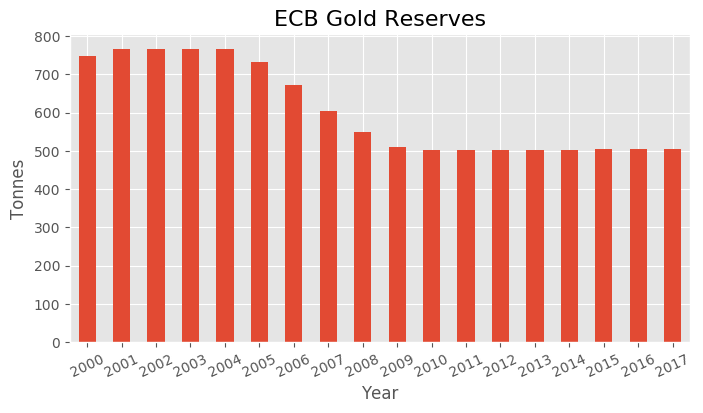

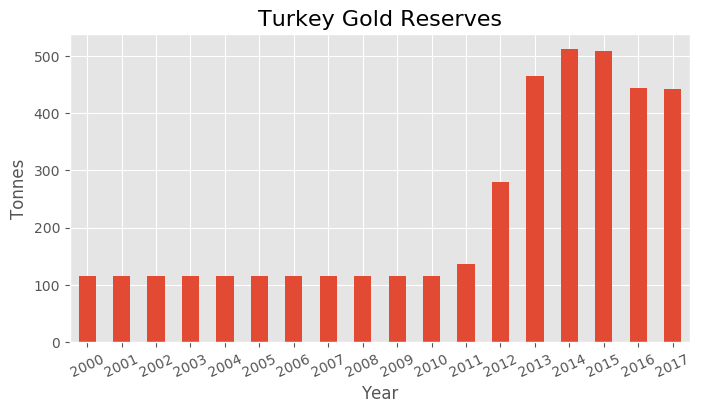

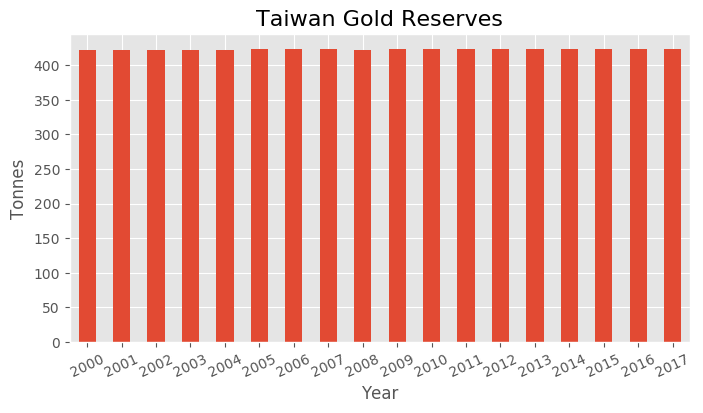

In [16]:
##############  用迴圈畫圖  ###########################
plt.rcdefaults()  ##重置 plt.rcParams
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['axes.labelsize'] = 12  ##設定x y軸 label 字體大小
plt.rcParams['axes.titlesize'] = 16    # 設定標題大小
#plt.rcParams['savefig.transparent'] = True  # 存檔背景透明
plt.rcParams['savefig.bbox'] = 'tight'  # 把所有的標籤都存進圖片(不會被切掉)

i=0
for num in range(len(gr.columns)):
    gr[gr.columns[i:i+1]].plot(kind='bar', legend=False).set_xticklabels(list_year)
    plt.title('%s%s' %(  gr.columns[i], ' Gold Reserves')) ; plt.ylabel('Tonnes')
    #plt.ylim(0,9000) 
    plt.xticks(rotation=25)
    #plt.savefig('%s%s%s' %('img/GoldReserves_', gr.columns[i], '.png'))
    i += 1

# 黃金 ETF

In [17]:
ge = pd.read_csv('Gold_ETF.csv')
ge = ge.rename(columns={'ETF holding(Tonnes)':'ETF holding'})  #改欄位名稱
ge['ETF holding'].astype('float')  #將ETF holding 屬性轉為float
ge  = ge.set_index(ge['Year'])  #將Year欄位設為index
#del ge['Year']  #刪除 Year欄位
ge.head()

,Year,ETF holding,Gold Price
Year,,,
2003,2003,41.45,363.32
2004,2004,173.30,409.17
2005,2005,384.37,444.45
2006,2006,643.06,603.77
2007,2007,902.70,695.39


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

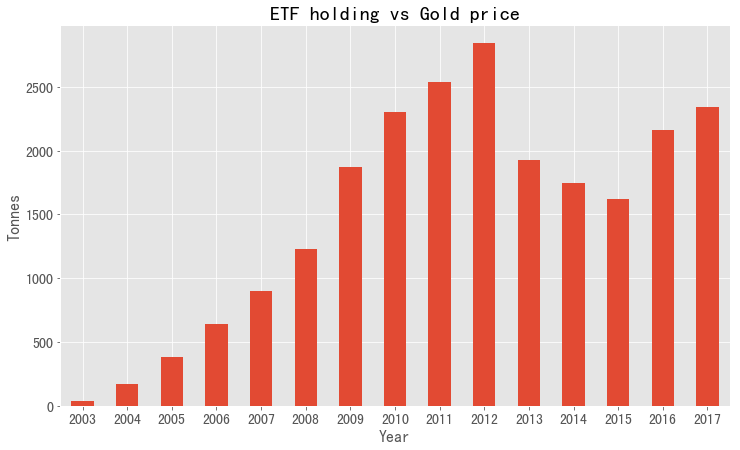

In [18]:
plt.rcdefaults()  ##重置 plt.rcParams
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family']='SimHei'   # 顯示中文 且為黑體
plt.rcParams['figure.figsize'] = (12,7)
plt.rcParams['axes.titlesize'] = 20    # 設定標題大小
plt.rcParams['xtick.labelsize'] = 14 # x軸標籤大小
plt.rcParams['ytick.labelsize'] = 14 # y軸標籤大小
plt.rcParams['axes.labelsize'] = 16  ##設定x y軸 label 字體大小
#plt.rcParams['savefig.transparent'] = True  # 存檔背景透明
plt.rcParams['savefig.bbox'] = 'tight'  # 把所有的標籤都存進圖片(不會被切掉)

ge['ETF holding'].plot(kind = 'bar', legend = False)
plt.title('ETF holding vs Gold price')
plt.ylabel('Tonnes')
plt.xticks(rotation=0)  # 旋轉角度

#plt.savefig('img/ETF holding.png')

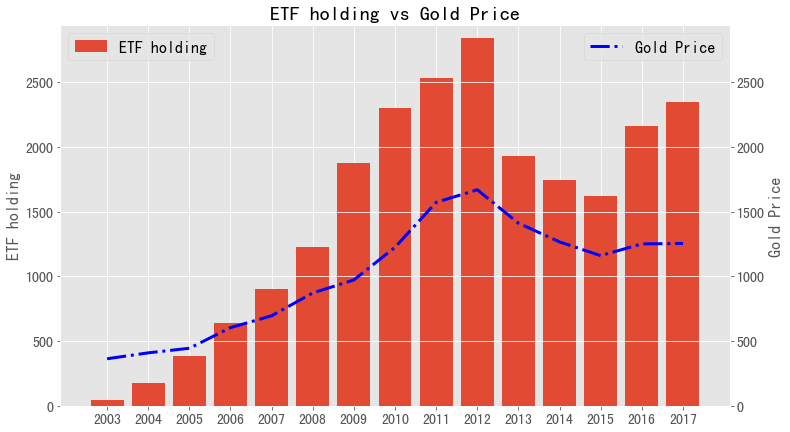

In [19]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(ge.index, ge['ETF holding'], label='ETF holding')
ax2.plot(ge.index, ge['Gold Price'], color='blue', label='Gold Price', linestyle='-.', linewidth=3)
ax.set_xticks(ge.index)
ax.legend(loc='upper left', fontsize=16); ax.set_ylabel('ETF holding'); ax.set_ylim(0, ge['ETF holding'].max()+100)
ax2.legend(loc='upper right', fontsize=16); ax2.set_ylabel('Gold Price'); ax2.set_ylim(0, ge['ETF holding'].max()+100)
plt.title('ETF holding vs Gold Price')

#plt.savefig('img/ETF holding vs Gold price.png')